# *Importing Modules*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

# *Initializing Points*

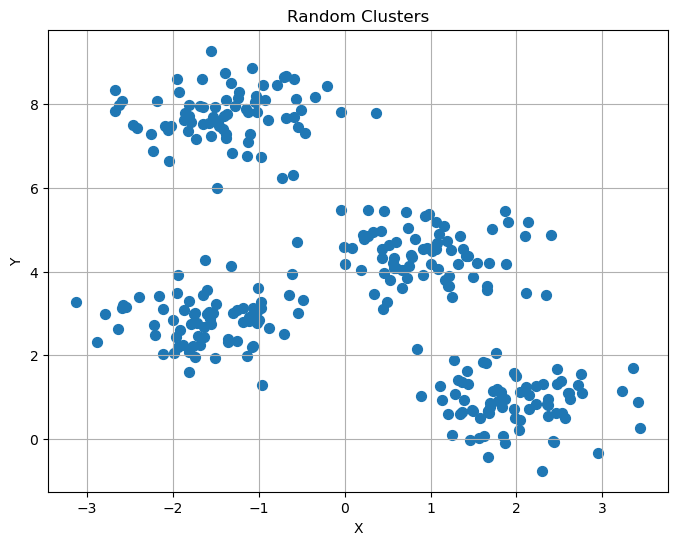

In [2]:
from sklearn.datasets import make_blobs

# Generate random clusters
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
x,y=X[:,0],X[:,1]
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Random Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [3]:
x

array([ 8.36856841e-01, -1.41365810e+00,  1.15521298e+00, -1.01861632e+00,
        1.27135141e+00,  3.43761754e+00, -1.80822253e+00,  1.41372442e+00,
       -2.04932168e-01, -7.11099611e-01, -1.71237268e+00, -2.67000792e+00,
        1.24258802e+00, -2.22783649e+00,  1.45513831e+00,  4.53791789e-01,
        1.06923853e+00,  2.56936589e+00, -1.06690610e+00, -1.07859101e+00,
        2.71506328e+00,  1.77710994e+00,  7.34363910e-01, -1.99648151e+00,
       -1.91828017e+00, -5.55523811e-01,  1.69747910e+00,  5.94762432e-01,
       -2.88024255e+00,  1.86725632e-01, -5.13333436e-01, -2.05701103e+00,
        1.87271752e+00, -1.13121396e+00, -1.64428957e+00, -2.41933824e+00,
       -2.01606928e+00, -2.62142780e+00, -2.20299950e+00,  1.66382237e+00,
        6.69786996e-01, -1.98539037e+00, -4.74920358e-02,  1.54462126e+00,
       -1.70200643e+00, -1.02192525e+00, -1.37842552e+00, -1.55220688e+00,
       -1.47904303e+00,  1.98894313e+00, -1.94972418e+00,  2.45509737e+00,
       -8.94327882e-01,  

# *Function for Distance*

In [4]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [5]:
calculate_distance(10,18,11,17)

1.4142135623730951

# *Initializing Parameter*

In [6]:
k=4
number_of_iter=1000
centers_list = np.random.rand(k, 2)
centers_list

array([[0.644669  , 0.7415773 ],
       [0.26186307, 0.00209848],
       [0.33342299, 0.57930251],
       [0.69162588, 0.53958083]])

# *Clustering_Model*

In [16]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def k_means(k, number_of_iter, center_list, x, y):
    group_of_points = [[] for _ in range(k)]
    
    for _ in range(number_of_iter):
        # Assign each point to the nearest centroid
        for i in range(len(x)):
            min_distance = np.inf
            center_index = 0
            for index, center in enumerate(center_list):
                distance = calculate_distance(center[0], center[1], x[i], y[i])
                if min_distance > distance:
                    min_distance = distance
                    center_index = index
            group_of_points[center_index].append((x[i], y[i]))
        
        # Update centroids
        for index, group in enumerate(group_of_points):
            if len(group) > 0:
                center_list[index] = np.mean(group, axis=0)
    
    return center_list,group_of_points


In [17]:
centers_list,group_of_points=k_means(k,number_of_iter,centers_list,x,y)

# *Drawing Points*

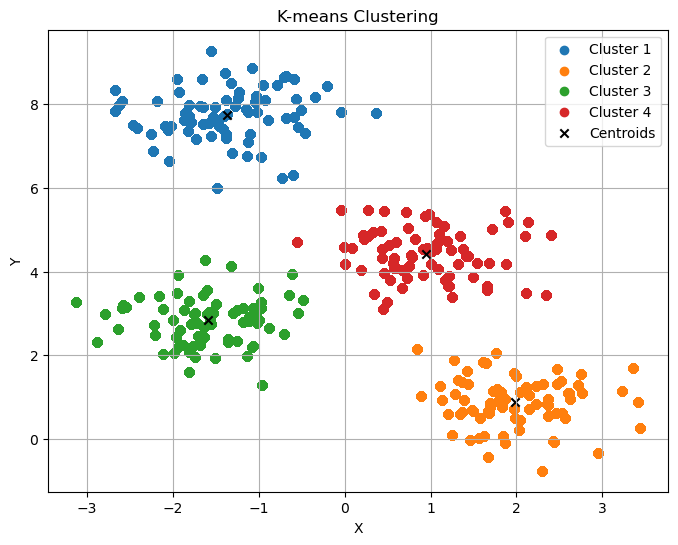

In [18]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot points in each cluster group
for i in range(len(group_of_points)):
    group_points = np.array(group_of_points[i])
    plt.scatter(group_points[:, 0], group_points[:, 1], label=f'Cluster {i+1}')

# Plot centroids
centers_array = np.array(centers_list)
plt.scatter(centers_array[:, 0], centers_array[:, 1], c='k', marker='x', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# *Evaluation of the model*

In [20]:
#SSD
j=0
def calculate_error(lst,center):
    j=0
    for element in lst:
       j +=calculate_distance(element[0],element[1],center[0],center[1])
    return j / (len(lst))
for i in range(len(centers_array)):
    j+=calculate_error(group_of_points[i],centers_array[i])
j

2.97191817414261